In [1]:
import numpy as np
import pandas as pd
import os
import openpyxl
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
file_database=pd.read_csv('database.csv')
strains=pd.read_csv('serovar_process.csv')
header_index=file_database.columns.to_list()
# dataframe_output=pd.read_csv('output.csv')
our_Serotype=strains['strain'].to_list()

检测我们的serotype所在的serogroup

In [3]:
serovar_dectecting=[]
sero_group_result=[]

for serotypes in our_Serotype:
    for header in header_index:
        temp_check=file_database[header]
        temp_check=list(temp_check)
        for i in temp_check:
            i=str(i)
            if serotypes in i:
                serovar_dectecting.append(serotypes)
                sero_group_result.append(header)
                break

检测不能分类的

In [4]:
list1=set(our_Serotype)
list2=set(serovar_dectecting)
no_match=list1-list2
no_match=list(no_match)
print(len(no_match))

37


输出result文件 文件个数为xlsx

In [5]:
output={'serovar':serovar_dectecting, 'serogroup':sero_group_result}
output=pd.DataFrame(output)
output.to_excel('result.xlsx',index=False)
not_find=pd.DataFrame(no_match,columns=['Not Find'])
writer = pd.ExcelWriter('result.xlsx', mode="a", engine="openpyxl")
not_find.to_excel(writer,index=False,sheet_name='Not Find')
writer.close()

####手动整理到meta table中 汇总绘图

In [ ]:
file=pd.read_excel('serogroup_result.xlsx')
file_Serogroup=file['Serogroup'].to_list()

counter = Counter(file_Serogroup)
sorted_items = sorted(counter.items(), key=lambda x: x[1], reverse=True)

# for item, count in sorted_items:
#     print(f"{item}: {count}")

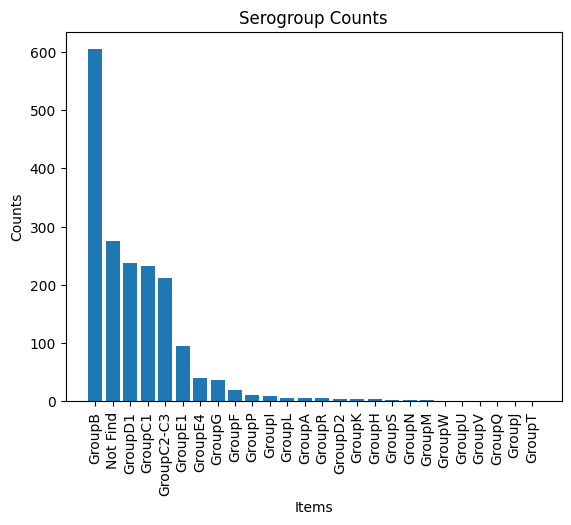

In [9]:
items, counts = zip(*sorted_items)
plt.bar(items, counts)
plt.xlabel('Items',)
plt.ylabel('Counts')
plt.title('Serogroup Counts')
plt.xticks(rotation=90)
plt.show()